In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (2).csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [4]:
s1=pd.read_csv('SalaryData_Train(1).csv')

In [5]:
s1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
s1['workclass']= label_encoder.fit_transform(s1['workclass'])
s1['education']= label_encoder.fit_transform(s1['education'])
s1['maritalstatus']= label_encoder.fit_transform(s1['maritalstatus'])
s1['occupation']= label_encoder.fit_transform(s1['occupation'])
s1['relationship']= label_encoder.fit_transform(s1['relationship'])
s1['race']= label_encoder.fit_transform(s1['race'])
s1['sex']= label_encoder.fit_transform(s1['sex'])
s1['native']= label_encoder.fit_transform(s1['native'])
s1['Salary']= label_encoder.fit_transform(s1['Salary'])

In [7]:
s1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [8]:
s1.shape

(30161, 14)

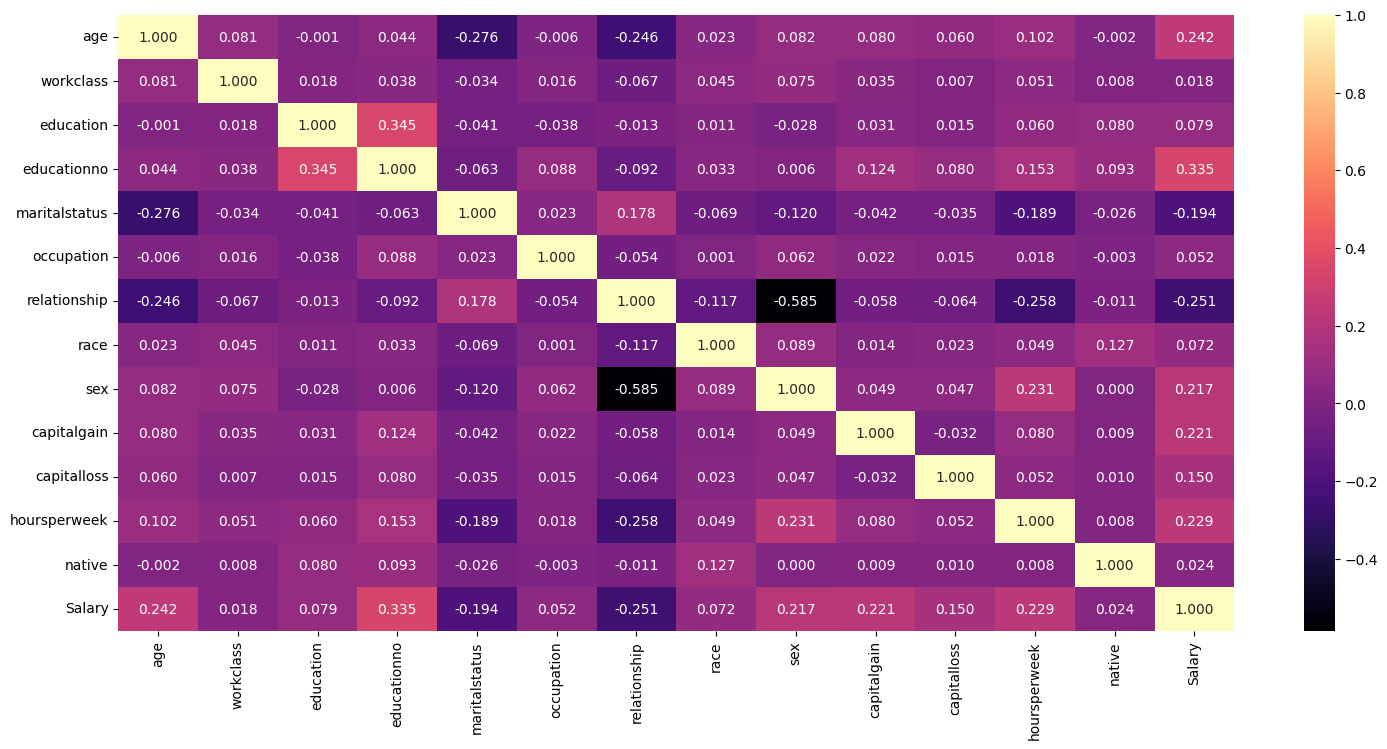

In [9]:
plt.figure(figsize = (18, 8));
sns.heatmap(s1.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [10]:
s2=pd.read_csv('SalaryData_Test(1).csv')

In [11]:
s2['workclass']= label_encoder.fit_transform(s2['workclass'])
s2['education']= label_encoder.fit_transform(s2['education'])
s2['maritalstatus']= label_encoder.fit_transform(s2['maritalstatus'])
s2['occupation']= label_encoder.fit_transform(s2['occupation'])
s2['relationship']= label_encoder.fit_transform(s2['relationship'])
s2['race']= label_encoder.fit_transform(s2['race'])
s2['sex']= label_encoder.fit_transform(s2['sex'])
s2['native']= label_encoder.fit_transform(s2['native'])
s2['Salary']= label_encoder.fit_transform(s2['Salary'])

In [12]:
s2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


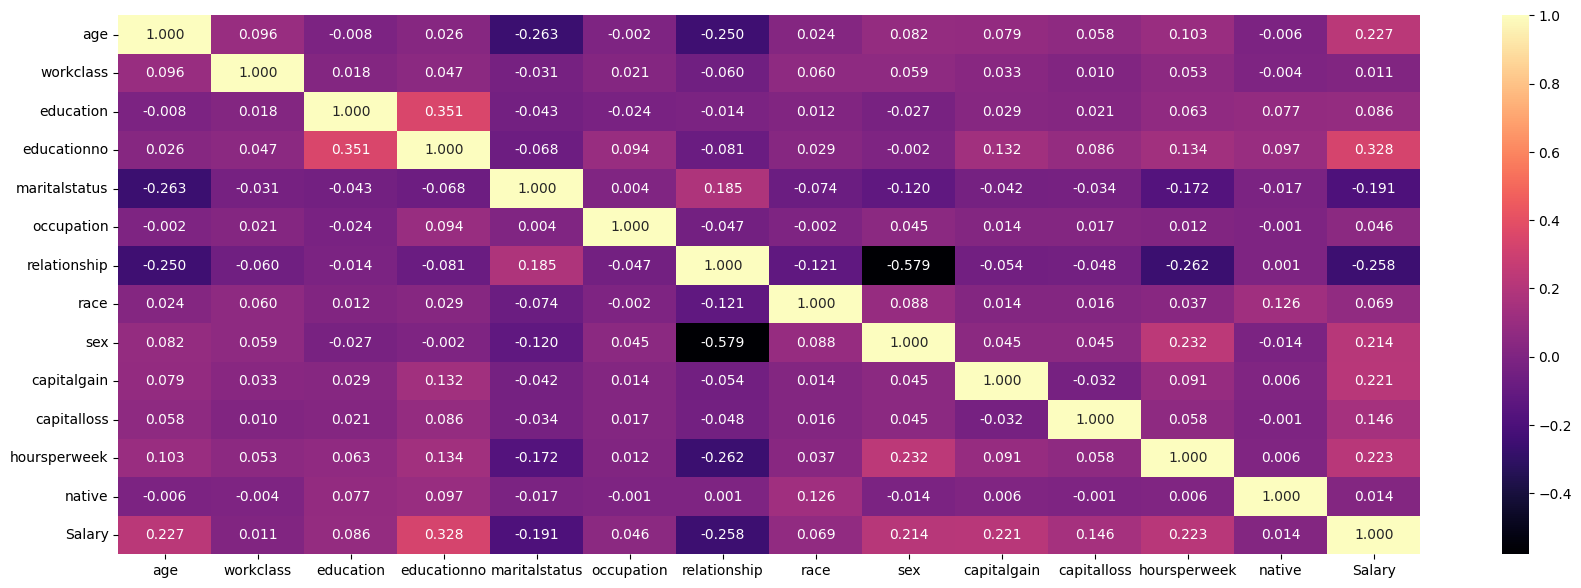

In [13]:
plt.figure(figsize = (21, 7));
sns.heatmap(s2.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [14]:
x_train=s1.iloc[:,0:13]
y_train=s1.iloc[:,13]

In [15]:
x_test=s2.iloc[:,0:13]
y_test=s2.iloc[:,13]

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.1],'C':[10] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10; 1/2] START C=10, gamma=0.1, kernel=linear.............................
